In [3]:
import os
import pandas as pd
import talib
import matplotlib.pyplot as plt

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')



In [5]:
# -------------------------------
# 1. Load and Filter CSV Files
# -------------------------------
data_dir = "../Data/yfinance_data"  # Directory containing historical stock CSVs
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]  # Filter CSV files

# Dictionary to store processed data
stock_data_dict = {}


Processed AAPL_historical_data.csv for AAPL


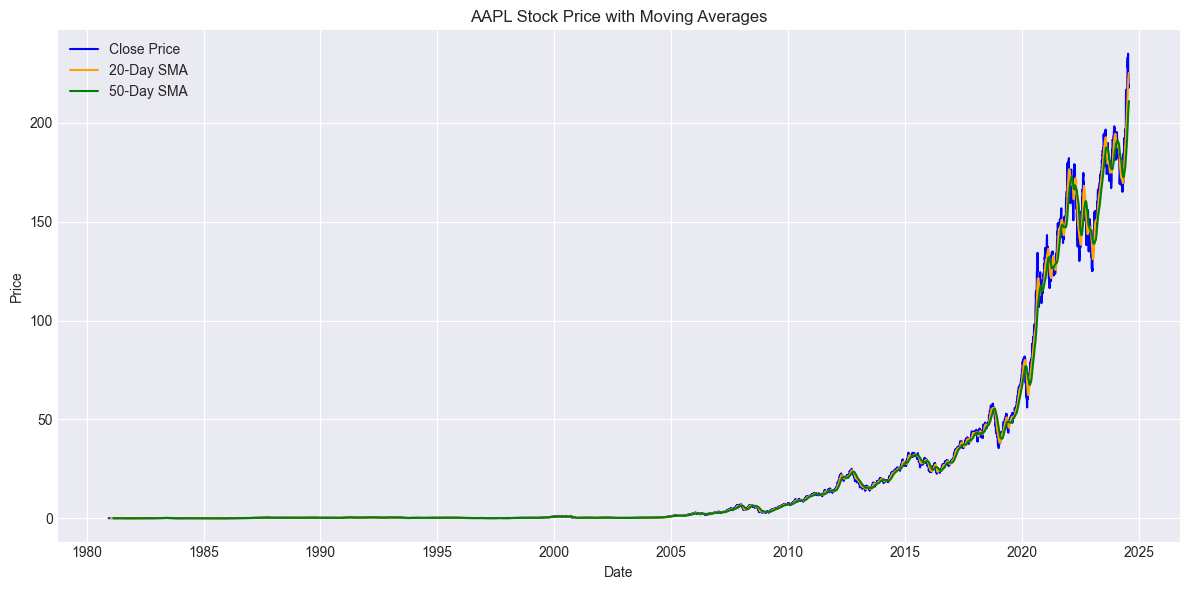

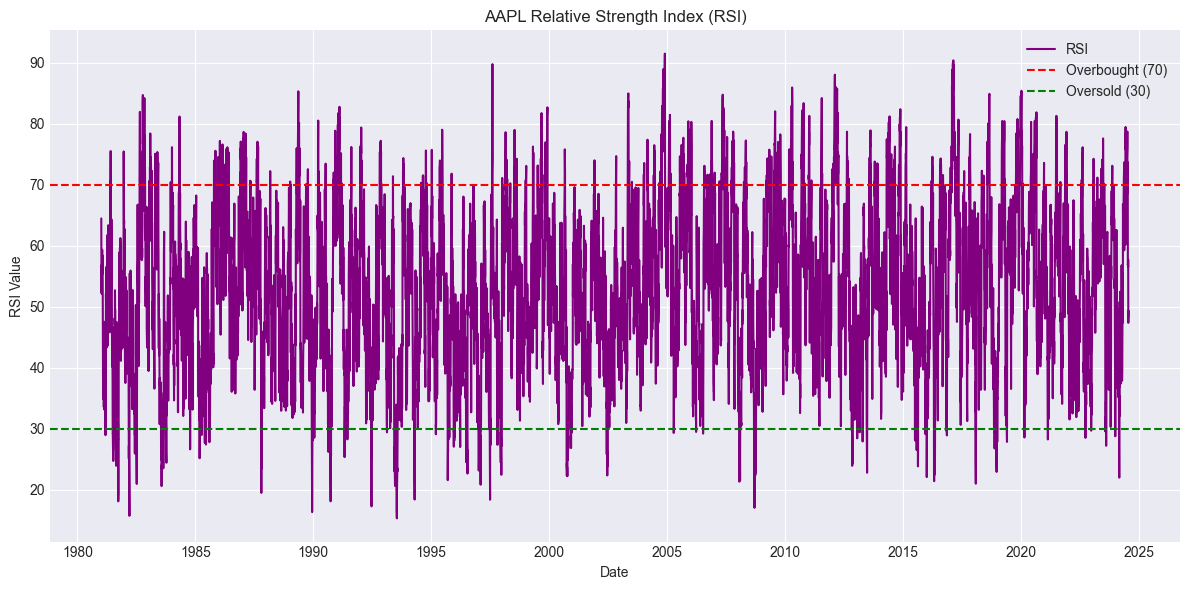

c:\Users\dagi\OneDrive\Desktop\Kifiya\Stock-market-sentiment-analysis\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


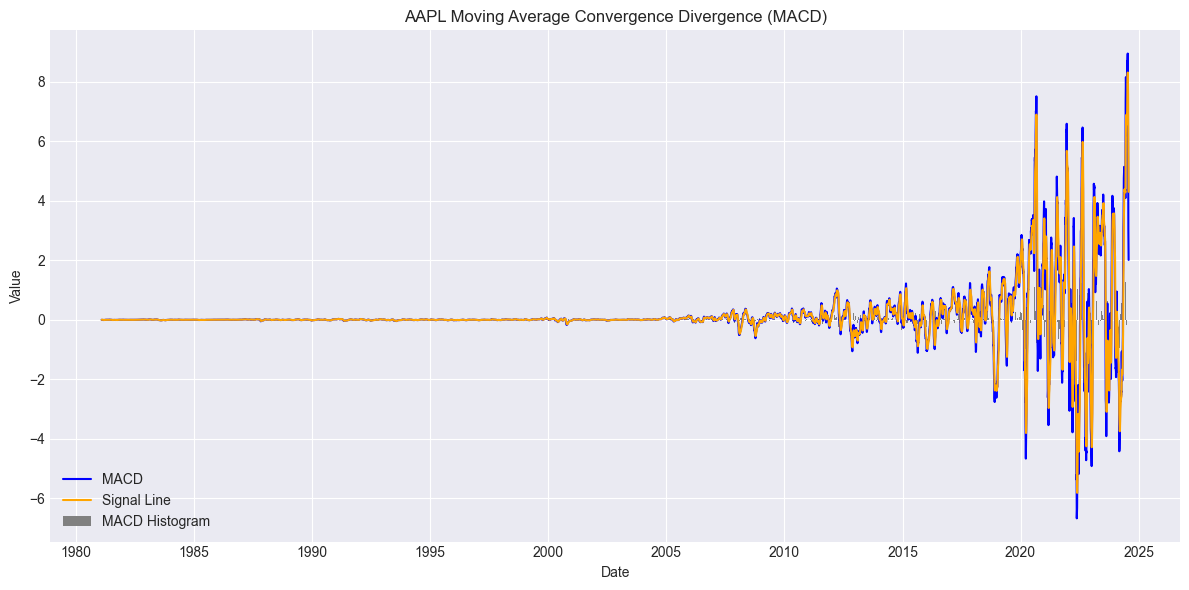

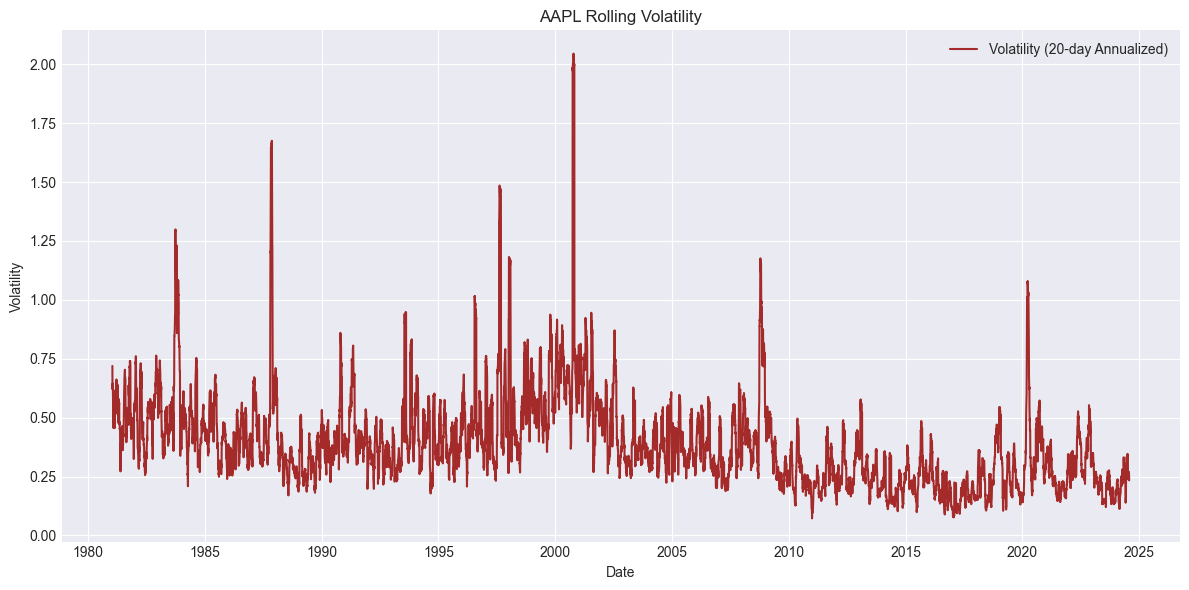

Processed AMZN_historical_data.csv for AMZN


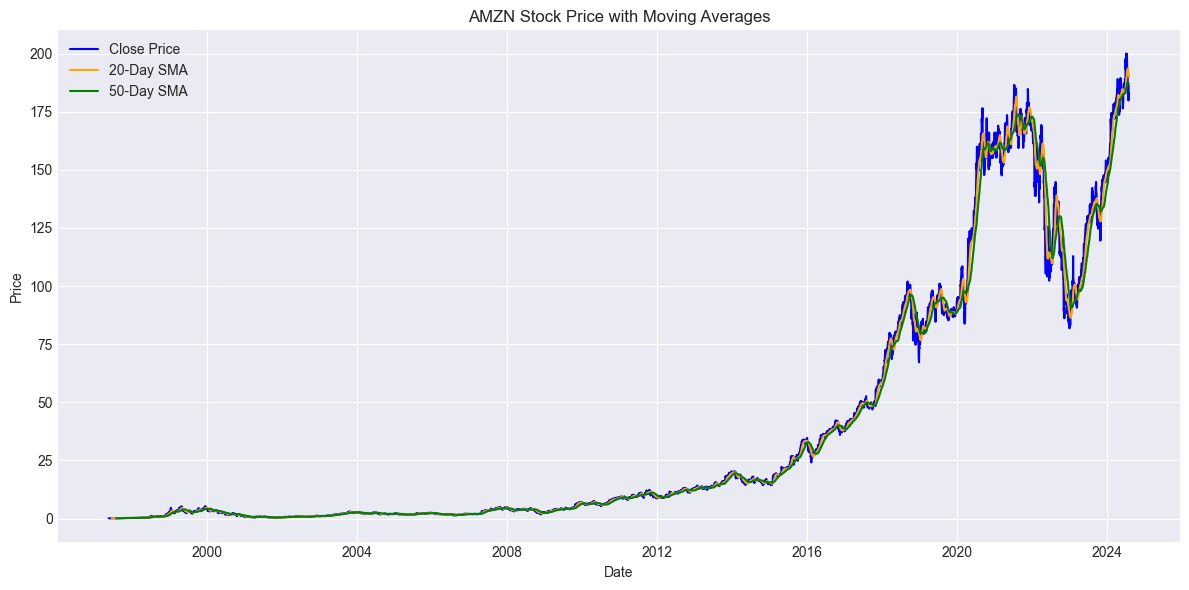

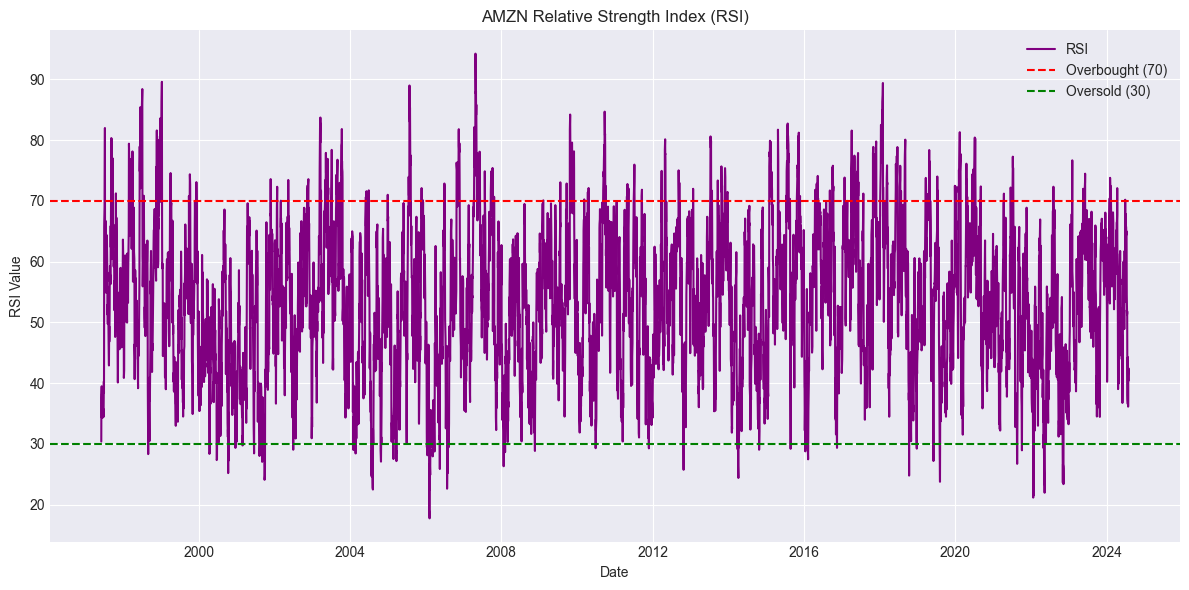

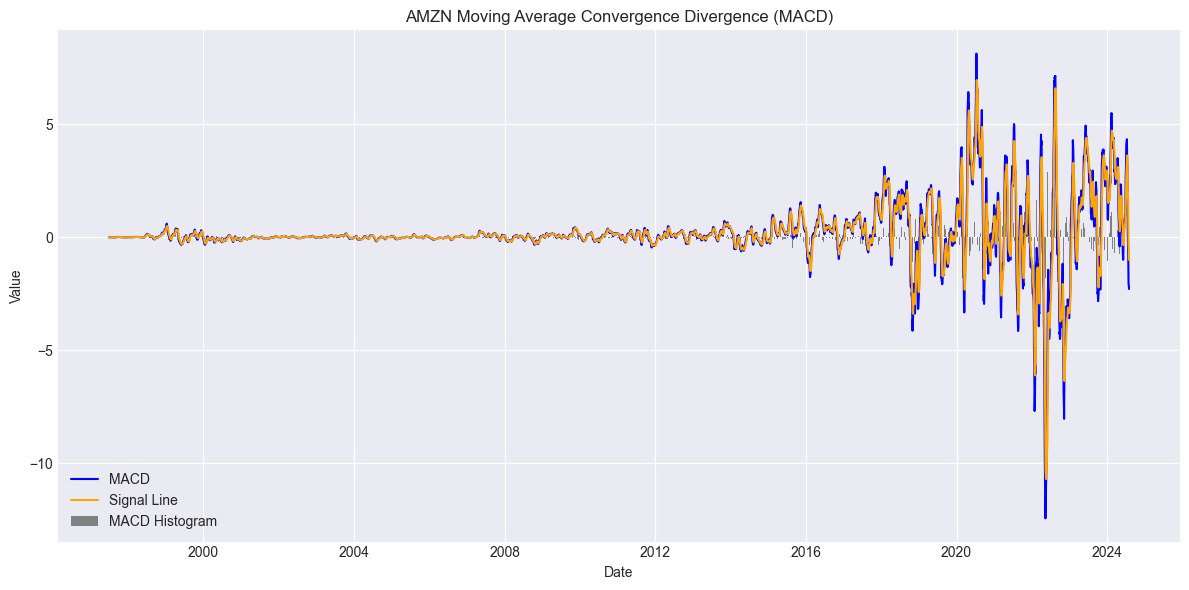

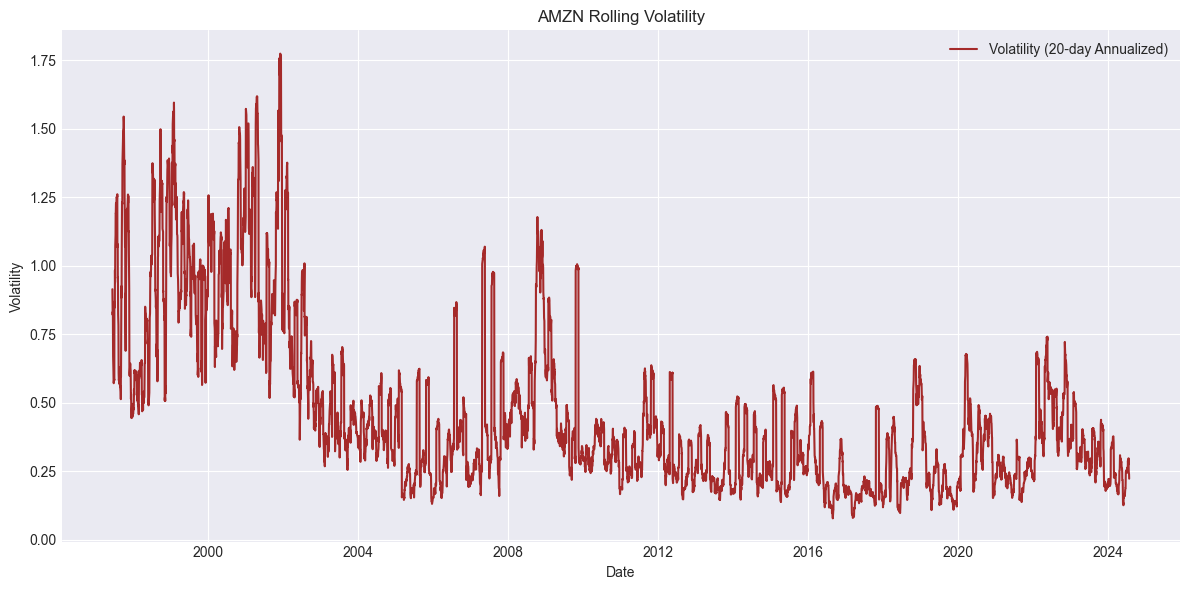

Processed GOOG_historical_data.csv for GOOG


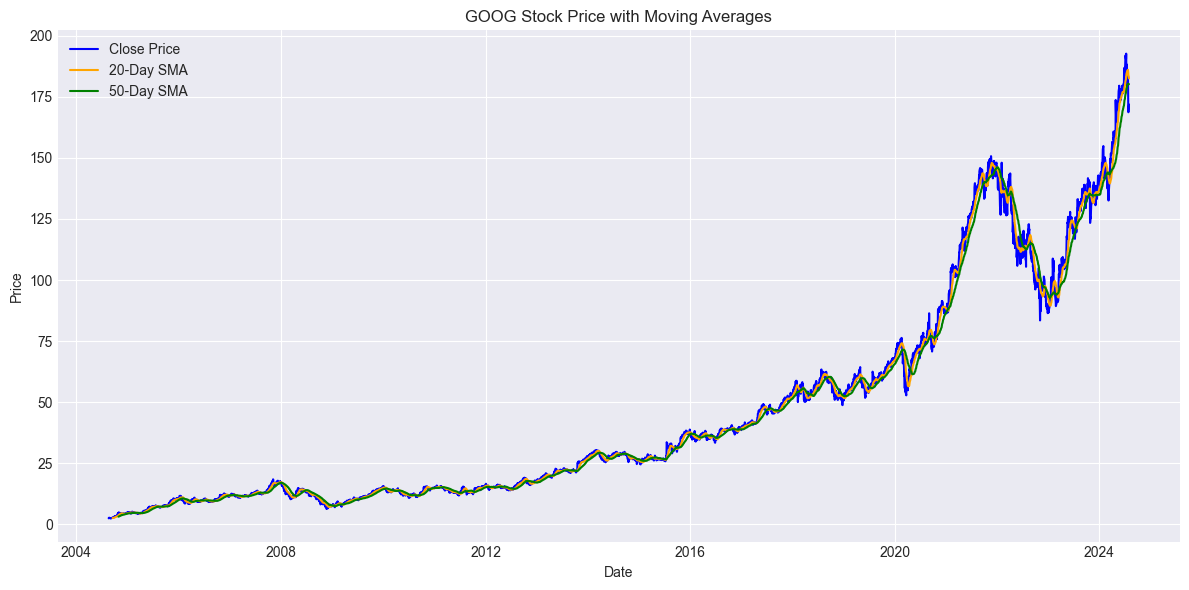

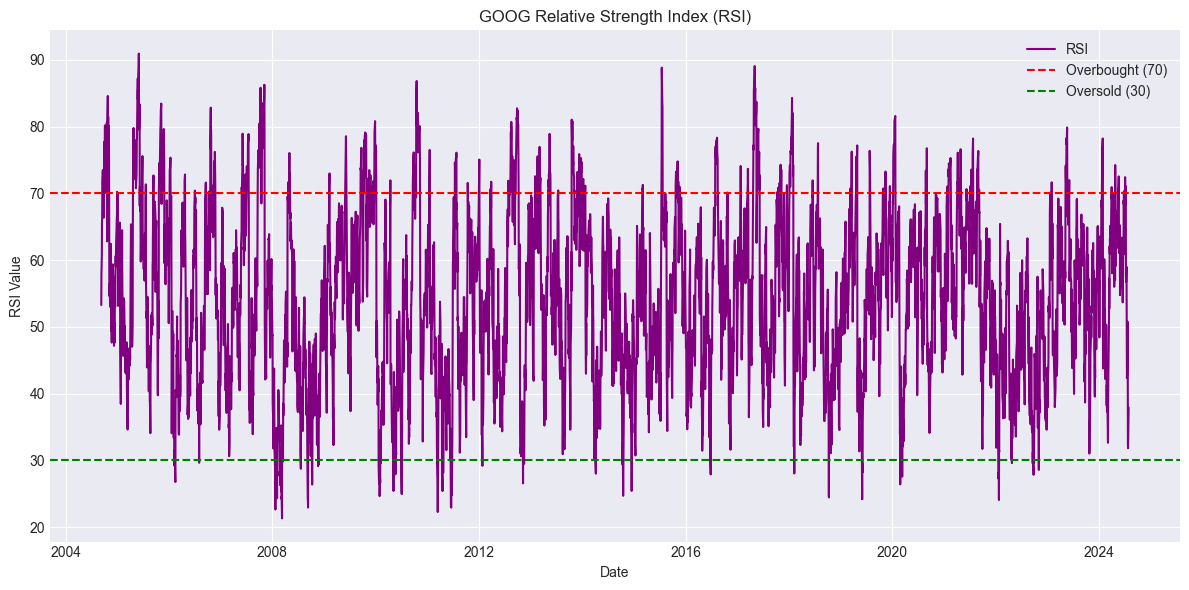

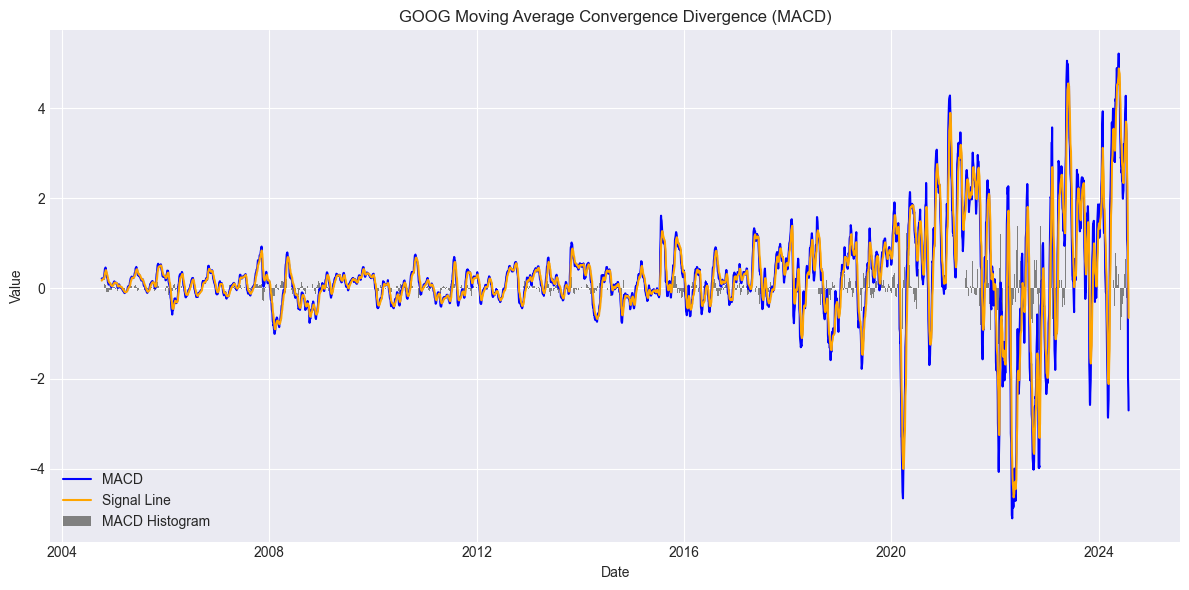

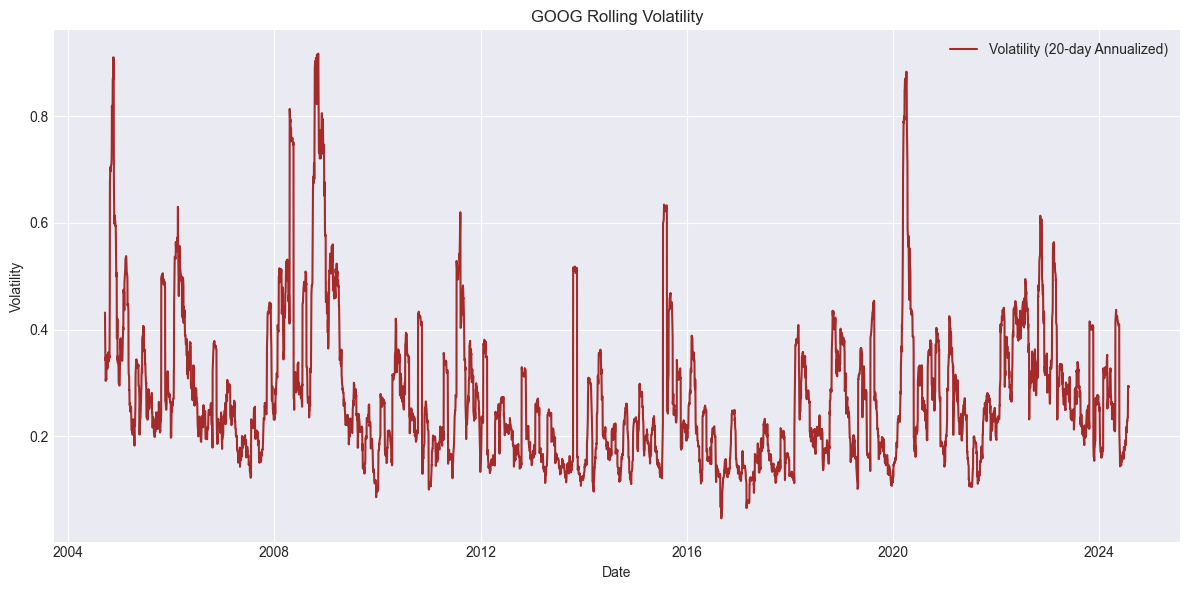

Processed META_historical_data.csv for META


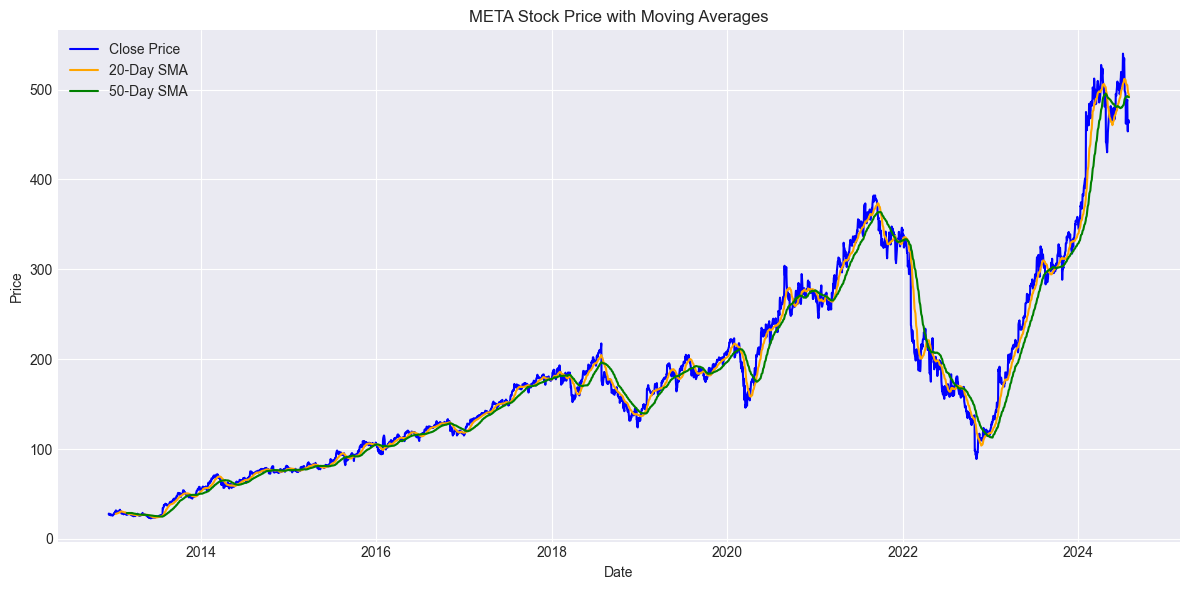

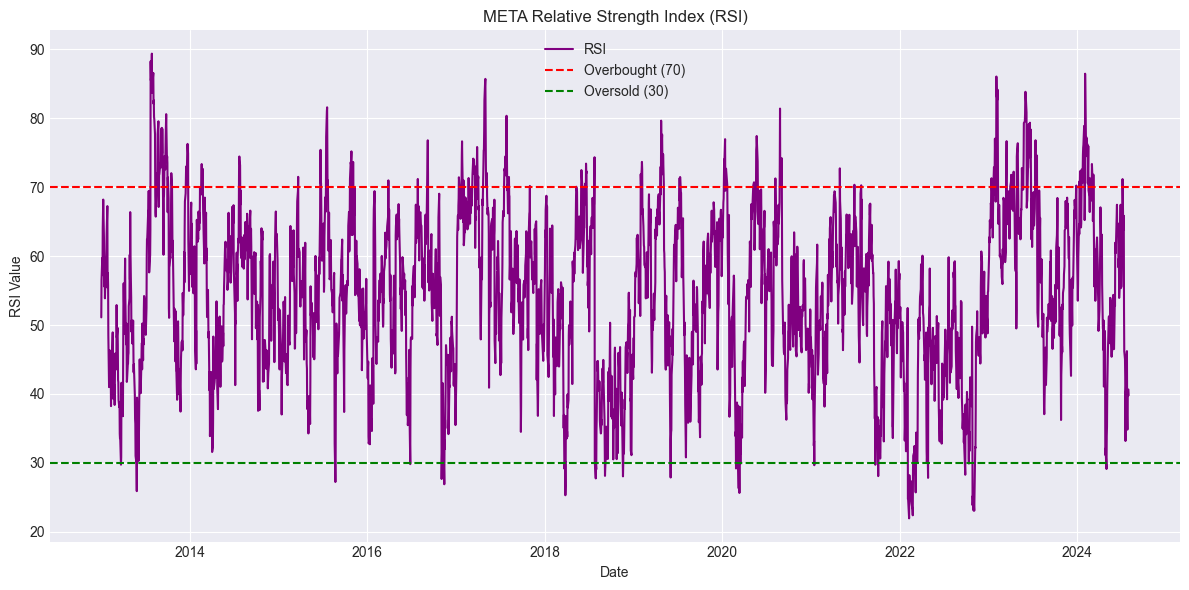

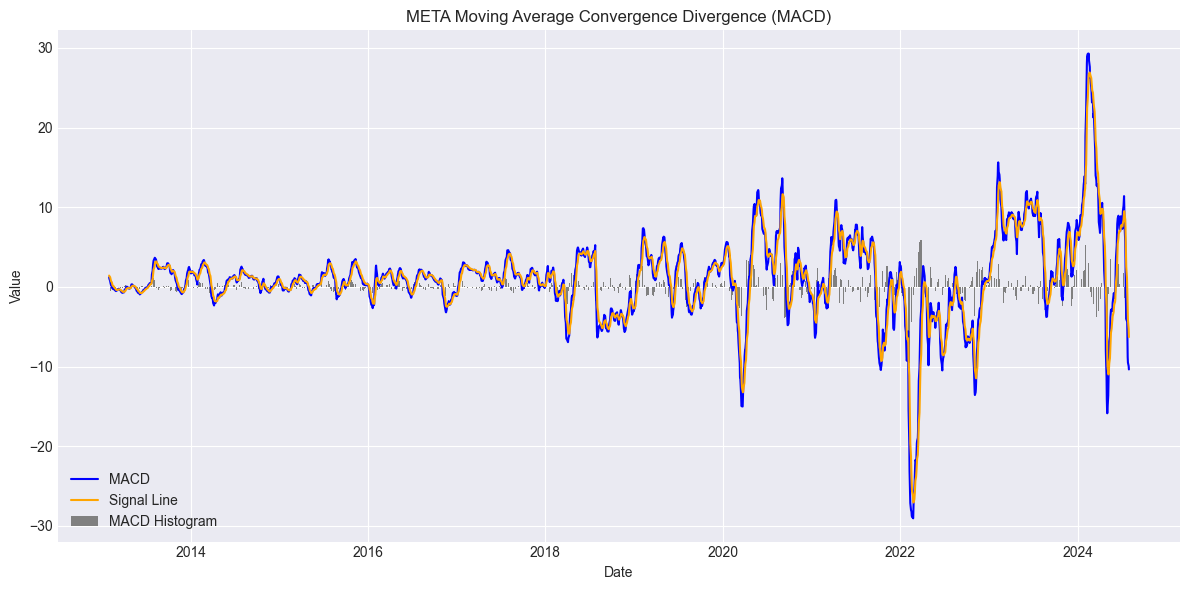

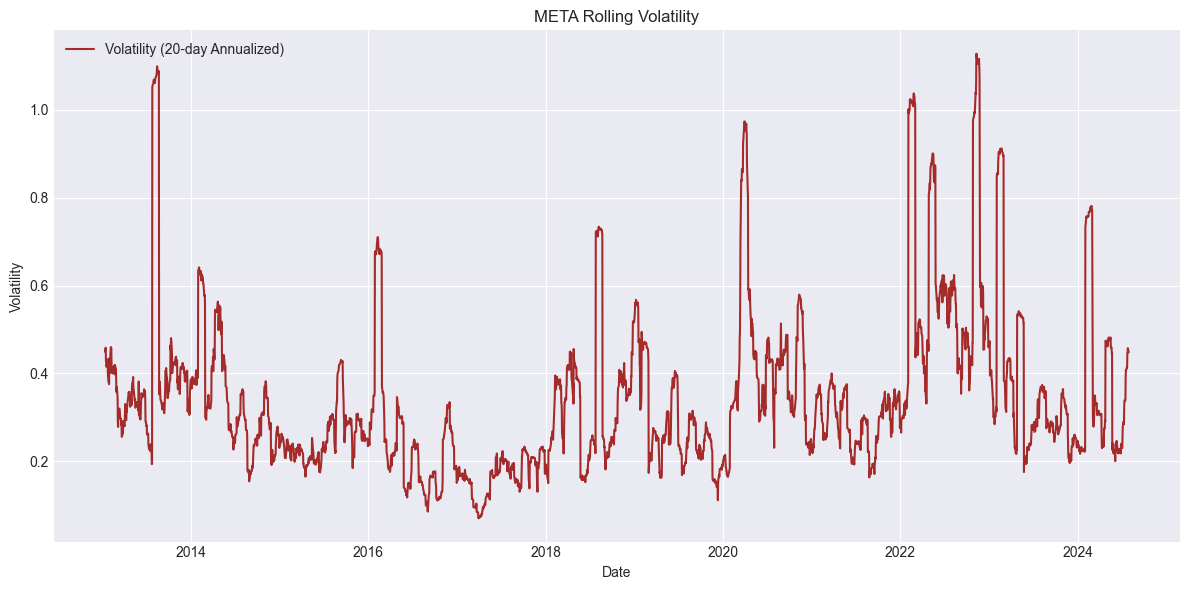

Processed MSFT_historical_data.csv for MSFT


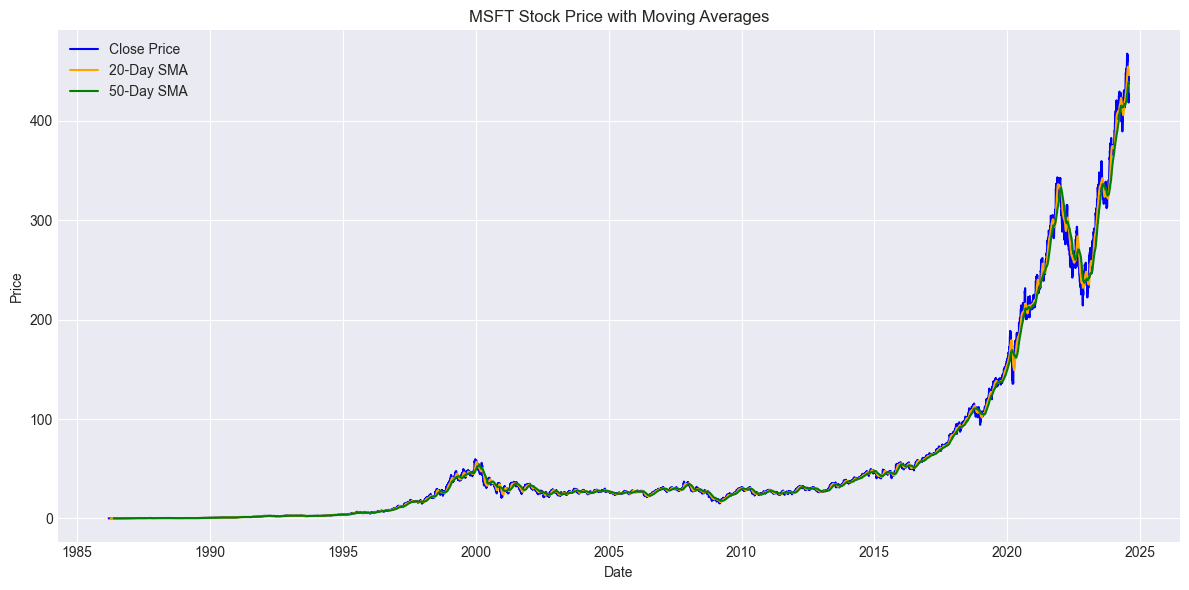

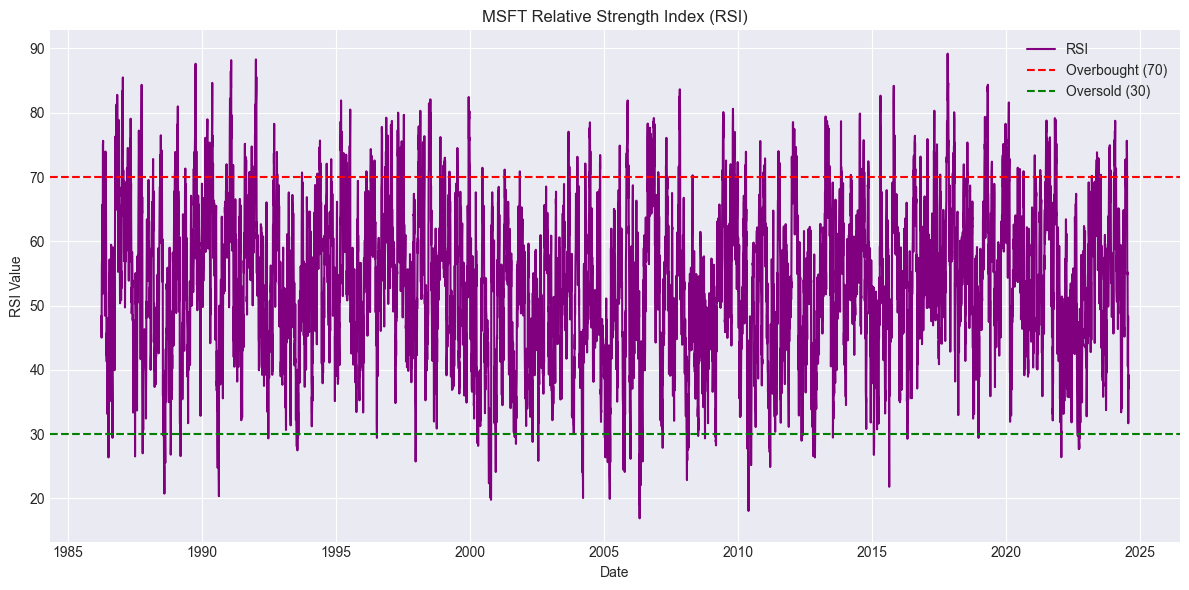

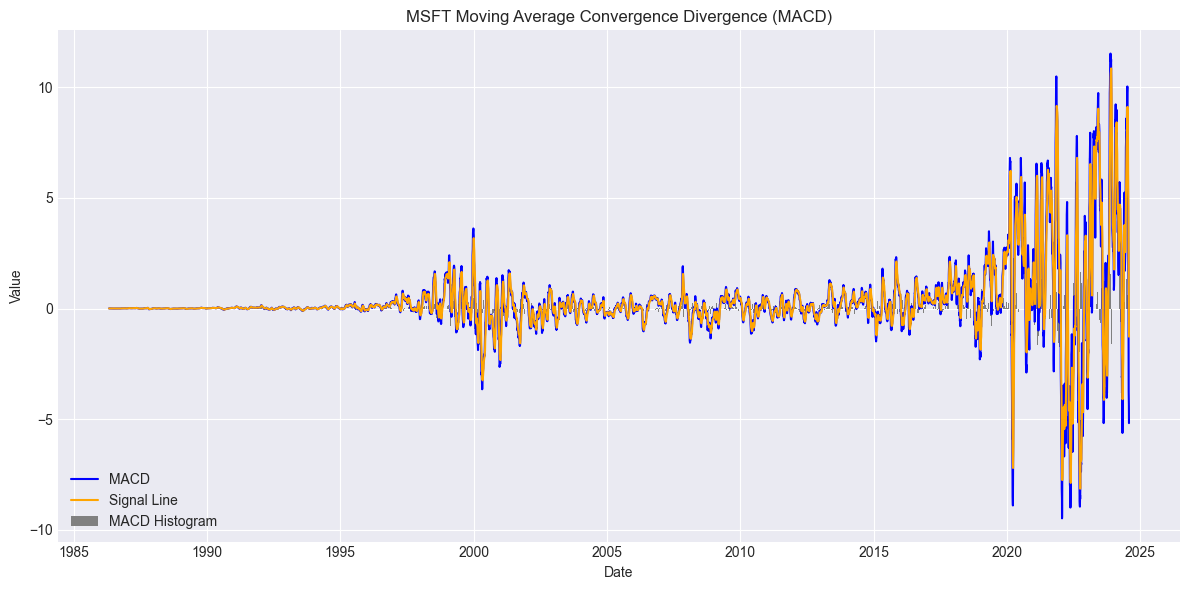

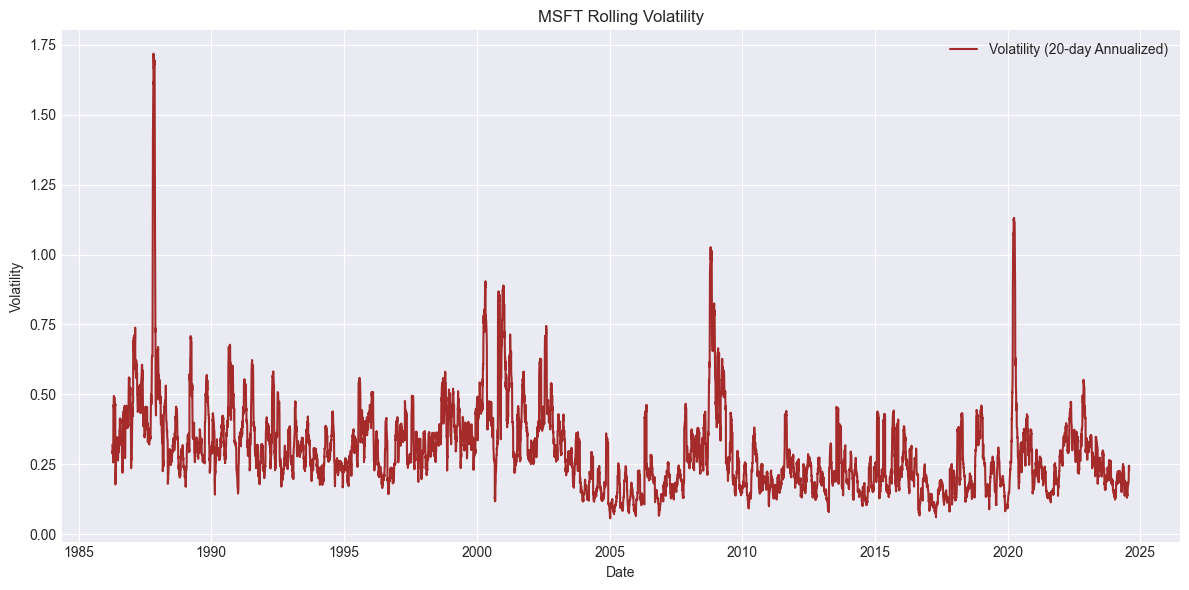

Processed NVDA_historical_data.csv for NVDA


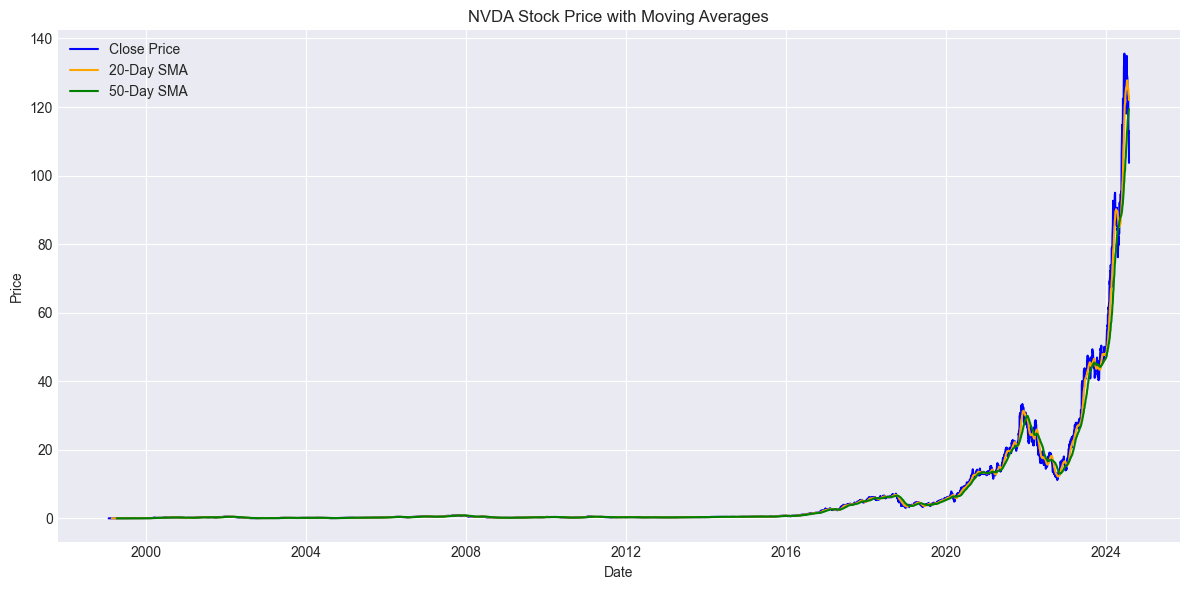

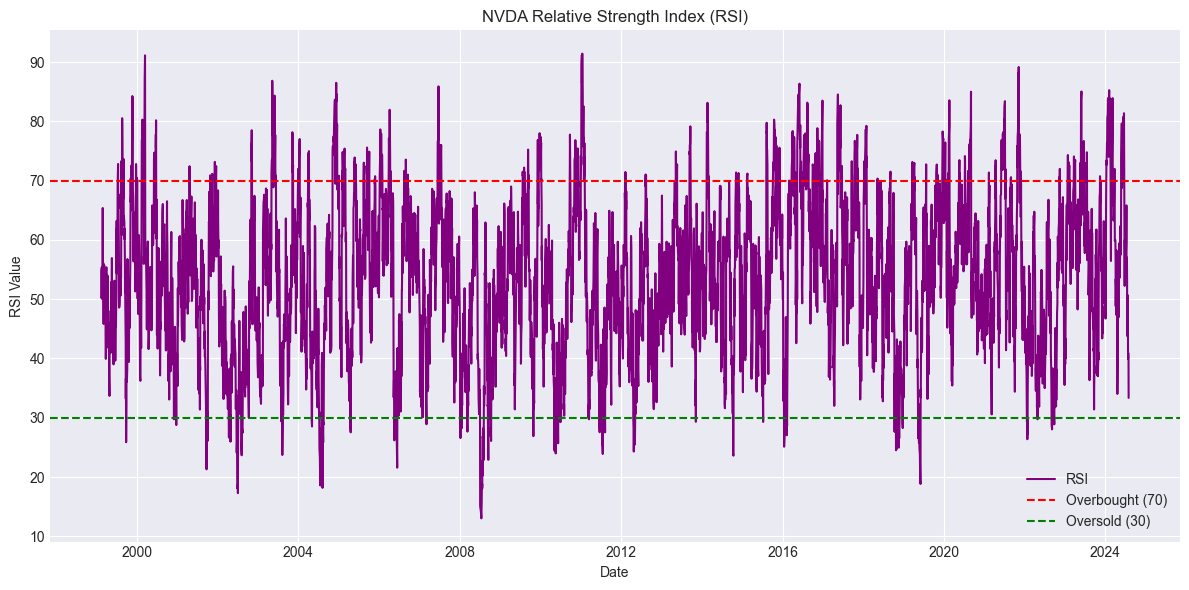

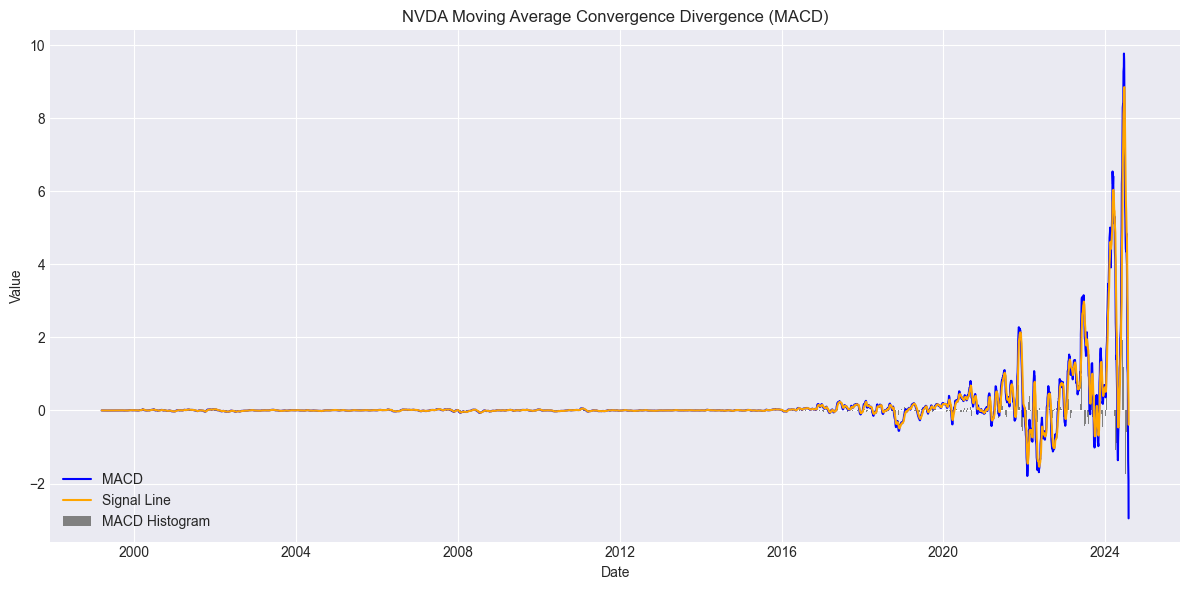

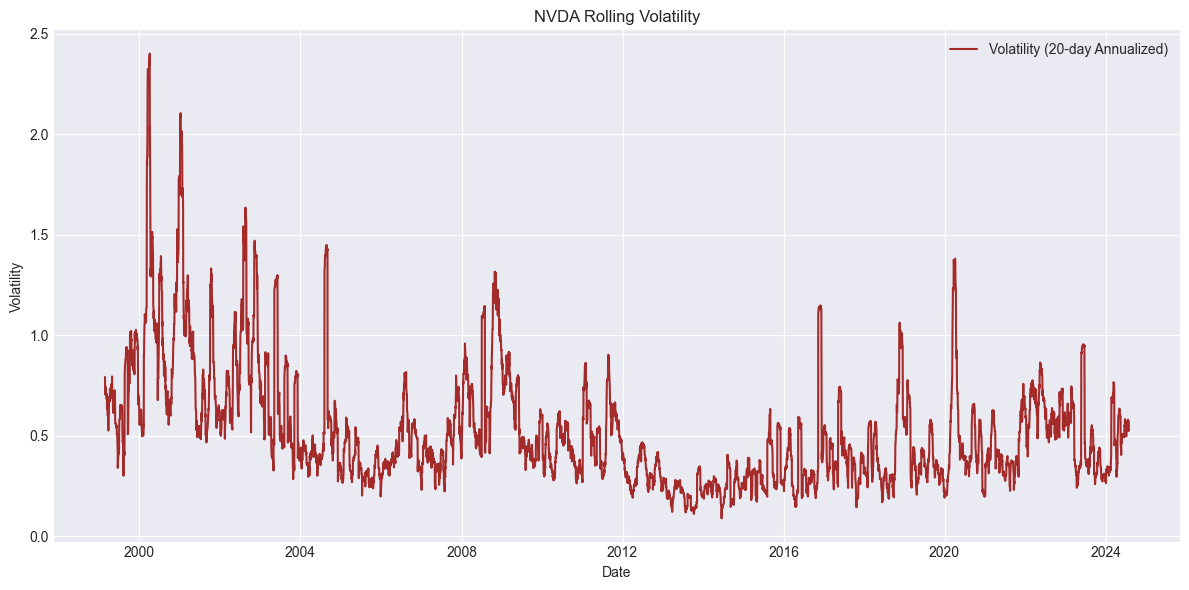

Processed TSLA_historical_data.csv for TSLA


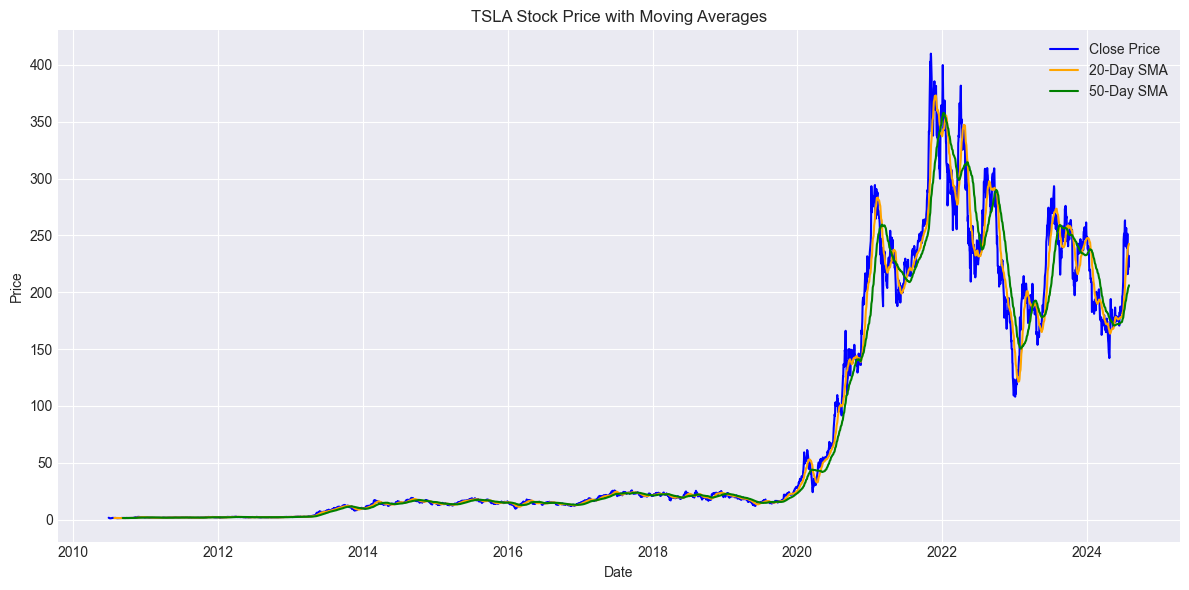

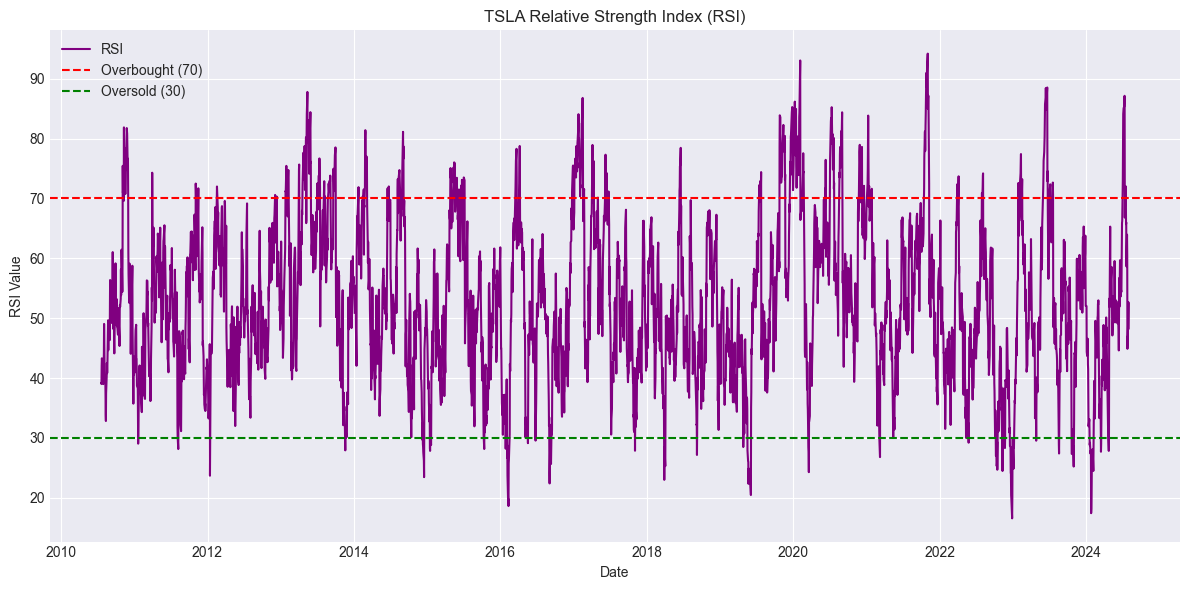

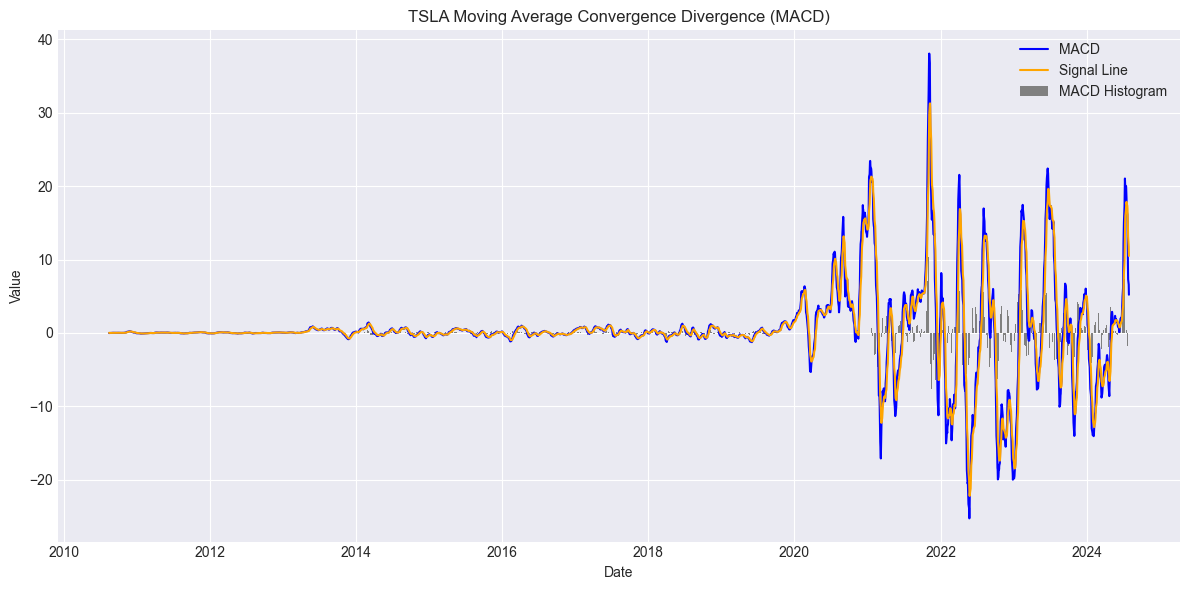

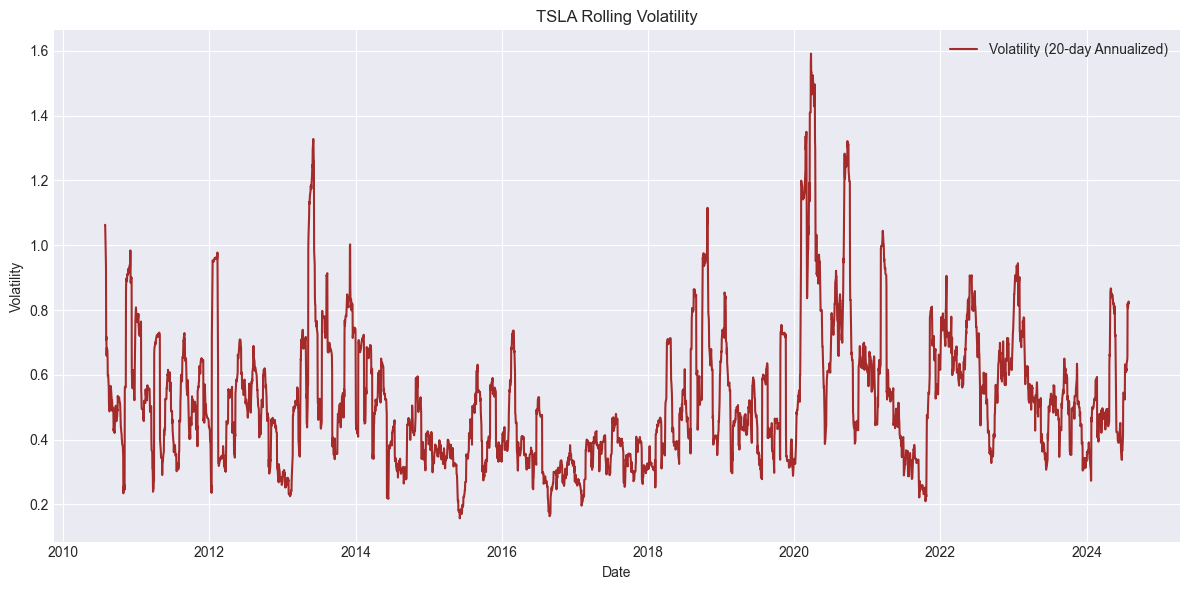

Saved processed data for AAPL to ../Data/processed_stock_data\AAPL_processed.csv
Saved processed data for AMZN to ../Data/processed_stock_data\AMZN_processed.csv
Saved processed data for GOOG to ../Data/processed_stock_data\GOOG_processed.csv
Saved processed data for META to ../Data/processed_stock_data\META_processed.csv
Saved processed data for MSFT to ../Data/processed_stock_data\MSFT_processed.csv
Saved processed data for NVDA to ../Data/processed_stock_data\NVDA_processed.csv
Saved processed data for TSLA to ../Data/processed_stock_data\TSLA_processed.csv


In [19]:
# -------------------------------
# 2. Loop Through Each CSV File
# -------------------------------
for file in csv_files:
    stock_symbol = file.split('_')[0]  # Extract stock symbol (e.g., AAPL)
    file_path = os.path.join(data_dir, file)
    stock_data = pd.read_csv(file_path)

    # Validate required columns
    required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in stock_data.columns for col in required_columns):
        print(f"Skipping {file}: Missing required columns.")
        continue
     # -------------------------------
    # 3. Prepare Data
    # -------------------------------
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])  # Convert to datetime
    stock_data.set_index('Date', inplace=True)
    stock_data.sort_index(inplace=True)
     # -------------------------------
    # 4. Calculate Technical Indicators
    # -------------------------------
    stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
    stock_data['SMA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)
    stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)
    
    macd, macdsignal, macdhist = talib.MACD(
        stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
    )
    stock_data['MACD'] = macd
    stock_data['MACD_Signal'] = macdsignal
    stock_data['MACD_Hist'] = macdhist

    # -------------------------------
    # 5. Calculate Returns & Volatility
    # -------------------------------
    stock_data['Daily_Return'] = stock_data['Close'].pct_change()
    stock_data['Volatility'] = stock_data['Daily_Return'].rolling(window=20).std() * (252 ** 0.5)

    # Store the result
    stock_data_dict[stock_symbol] = stock_data
    print(f"Processed {file} for {stock_symbol}")

    # -------------------------------
    # 6. Plot Indicators
    # -------------------------------

    # --- Plot 1: Close Price + SMAs ---
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    plt.plot(stock_data.index, stock_data['SMA_20'], label='20-Day SMA', color='orange')
    plt.plot(stock_data.index, stock_data['SMA_50'], label='50-Day SMA', color='green')
    plt.title(f"{stock_symbol} Stock Price with Moving Averages")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

     # --- Plot 2: RSI ---
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f"{stock_symbol} Relative Strength Index (RSI)")
    plt.xlabel('Date')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Plot 3: MACD ---
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['MACD'], label='MACD', color='blue')
    plt.plot(stock_data.index, stock_data['MACD_Signal'], label='Signal Line', color='orange')
    plt.bar(stock_data.index, stock_data['MACD_Hist'], label='MACD Histogram', color='gray')
    plt.title(f"{stock_symbol} Moving Average Convergence Divergence (MACD)")
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Plot 4: Volatility ---
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Volatility'], label='Volatility (20-day Annualized)', color='brown')
    plt.title(f"{stock_symbol} Rolling Volatility")
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.tight_layout()
    plt.show()

# -------------------------------
# 7. Save Processed Data to CSV
# -------------------------------
output_dir = "../Data/processed_stock_data"
os.makedirs(output_dir, exist_ok=True)

for stock_symbol, stock_data in stock_data_dict.items():
    output_file = os.path.join(output_dir, f"{stock_symbol}_processed.csv")
    stock_data.to_csv(output_file)
    print(f"Saved processed data for {stock_symbol} to {output_file}")